In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
df = df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]

df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device


In [9]:
# Select records for one user
p_df = df[df['User First Name'] == 'P12']
p_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
1289,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device
1290,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device
1291,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device
1292,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device
1293,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device
...,...,...,...,...,...,...,...,...,...
2579,P12,2024-01-07,2024-01-07T14:00:00,2024-01-08T12:21:00,80460,0,61140,11460,server
2580,P12,2024-01-07,2024-01-07T14:00:00,2024-01-08T12:21:00,80460,0,61140,11460,server
2581,P12,2024-01-07,2024-01-07T14:00:00,2024-01-08T12:21:00,80460,0,61140,11460,server
2582,P12,2024-01-07,2024-01-07T14:00:00,2024-01-08T12:21:00,80460,0,61140,11460,server


In [10]:
# Load glucose dataset
glucose_df = pd.read_csv('../data/P12/supersapiens/merged.csv', sep=';')

# Convert timestamp
glucose_df['recorded_timestamp'] = pd.to_datetime(glucose_df['recorded_timestamp'])

glucose_df

,glucose,recorded_timestamp
0,103,2023-12-23 00:00:27
1,104,2023-12-23 00:01:29
2,107,2023-12-23 00:02:29
3,112,2023-12-23 00:03:29
4,112,2023-12-23 00:04:30
...,...,...
18863,98,2023-12-28 23:55:57
18864,98,2023-12-28 23:56:57
18865,98,2023-12-28 23:57:57
18866,98,2023-12-28 23:58:58


In [11]:
# Group glucose by day
glucose_mean_per_day = pd.DataFrame(glucose_df.groupby(glucose_df['recorded_timestamp'].dt.date)['glucose'].mean())

# Change index data type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)

glucose_mean_per_day

,glucose
recorded_timestamp,
2023-12-21,81.019064
2023-12-22,95.214912
2023-12-23,100.565649
2023-12-24,103.860322
2023-12-25,104.198041
2023-12-26,108.802076
2023-12-27,108.478355
2023-12-28,105.195748
2023-12-29,105.966184


# Aggregate average glucose level of the day with sleep data

In [12]:
# Convert column type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)
p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])

# Join Garmin Dataset with Glucose Data
p_df_merged = pd.merge(p_df, glucose_mean_per_day, left_on='Calendar Date (Local)', how='inner', right_index=True)

p_df_merged

/var/folders/g1/1zlhdjc106z1jjy_cn0v6lxr0000gp/T/ipykernel_19892/165701922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
1289,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
1290,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
1291,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
1292,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
1293,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
...,...,...,...,...,...,...,...,...,...,...
2484,P12,2024-01-04,2024-01-04T14:00:00,2024-01-05T14:01:00,86460,0,53880,7140,server,110.583884
2485,P12,2024-01-04,2024-01-04T14:00:00,2024-01-05T14:01:00,86460,0,53880,7140,server,110.583884
2486,P12,2024-01-04,2024-01-04T14:00:00,2024-01-05T14:01:00,86460,0,53880,7140,server,110.583884
2487,P12,2024-01-04,2024-01-04T14:00:00,2024-01-05T14:01:00,86460,0,53880,7140,server,110.583884


In [36]:
# Trim columns
#sleep_glucose_df = p_df_merged.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]
sleep_glucose_df = p_df_merged.drop_duplicates(ignore_index=True)

sleep_glucose_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
0,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,48240,31680,172800,device,100.565649
1,P12,2023-12-24,2023-12-24T00:48:00,2023-12-24T05:14:40,16000,2200,5040,7500,device,103.860322
2,P12,2023-12-25,2023-12-25T00:31:00,2023-12-25T10:21:00,35400,7200,3600,19920,device,104.198041
3,P12,2023-12-26,2023-12-26T01:06:00,2023-12-26T09:38:00,30720,2400,3600,20100,device,108.802076
4,P12,2023-12-27,2023-12-27T00:27:00,2023-12-27T07:52:00,26700,6720,4140,14640,device,108.478355
5,P12,2023-12-28,2023-12-28T01:13:00,2023-12-28T07:31:00,22680,4380,6240,12060,device,105.195748
6,P12,2023-12-29,2023-12-29T01:14:00,2023-12-29T08:58:00,27840,6120,5160,14100,device,105.966184
7,P12,2023-12-30,2023-12-30T03:16:00,2023-12-30T11:35:00,29940,5040,4380,13800,device,112.118027
8,P12,2023-12-31,2023-12-31T02:16:00,2023-12-31T11:40:00,33840,8400,3780,18840,device,107.381974
9,P12,2024-01-01,2024-01-01T02:20:00,2024-01-01T09:42:00,26520,3000,9000,30720,device,106.787106


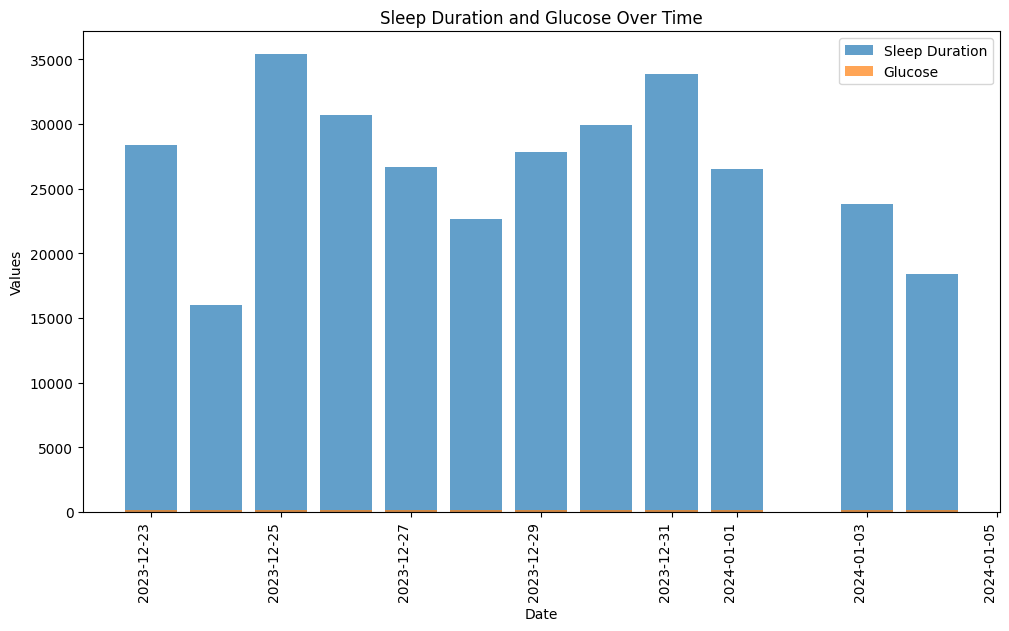

In [41]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

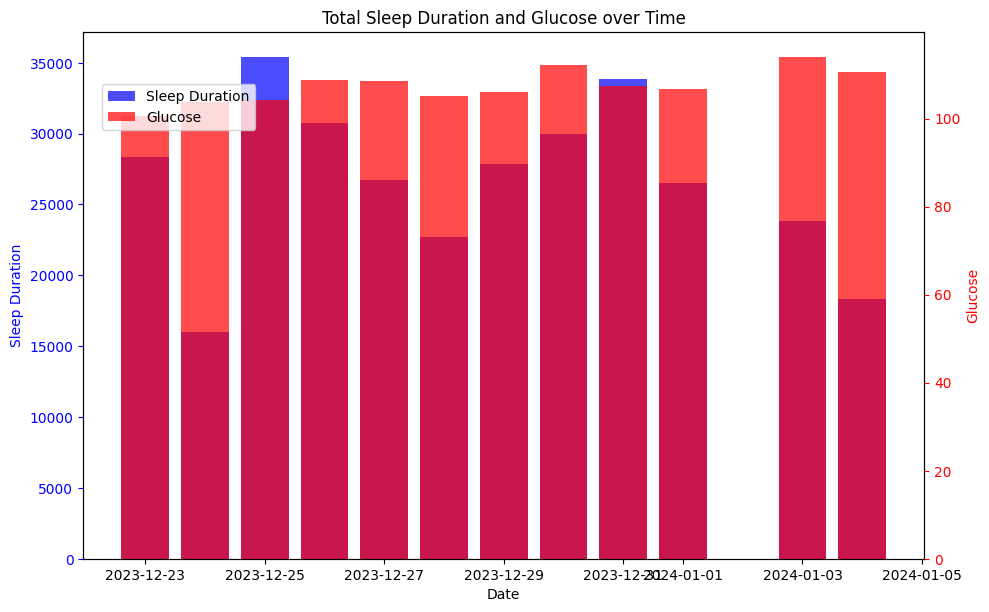

In [59]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'sleepDuration' on the primary y-axis
ax1.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sleep Duration', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'glucose'
ax2 = ax1.twinx()
ax2.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7, color='r')
ax2.set_ylabel('Glucose', color='r')
ax2.tick_params('y', colors='r')

# Format the x-axis labels
plt.xticks(rotation=45, ha='right')
#plt.xticks(df['Calendar Date (Local)'], rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Set title
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

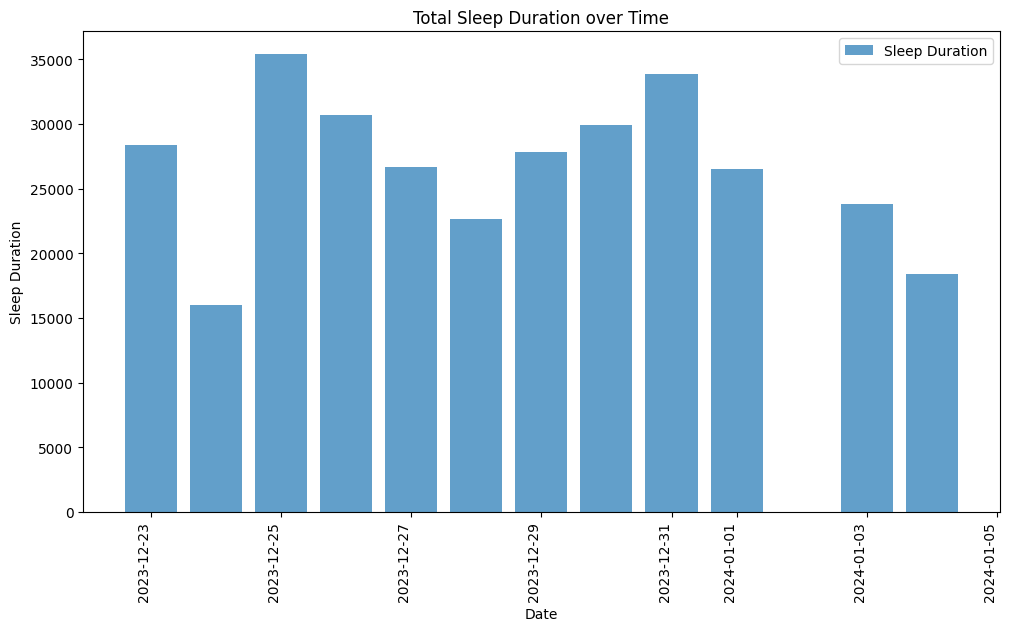

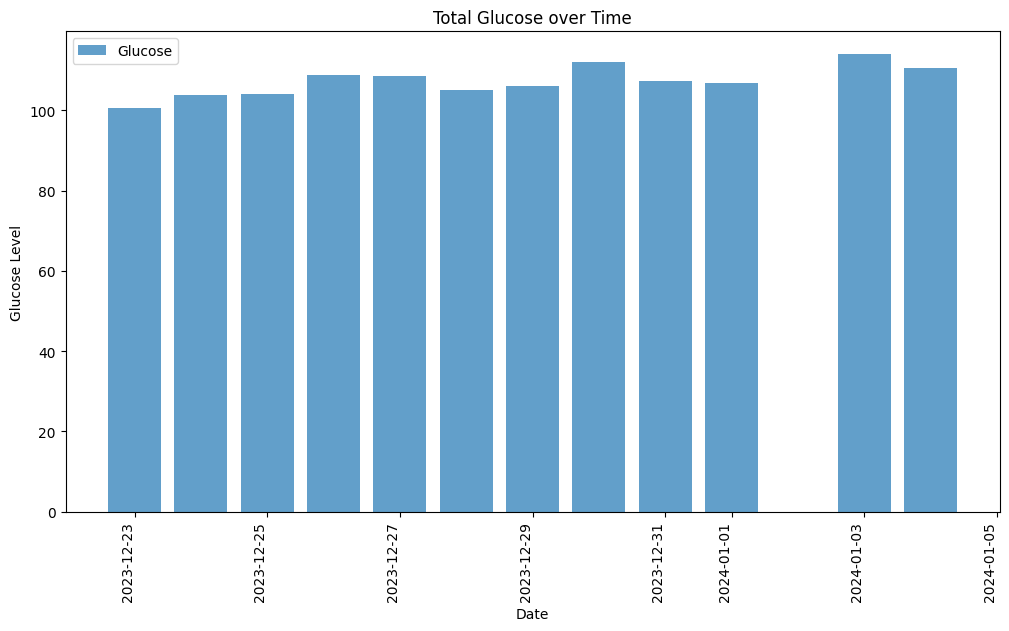

In [68]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Total Sleep Duration over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Glucose Level')
plt.title('Total Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Correlation between Sleep Duration and Glucose Level

Correlation Coefficient: -0.0789468769870221


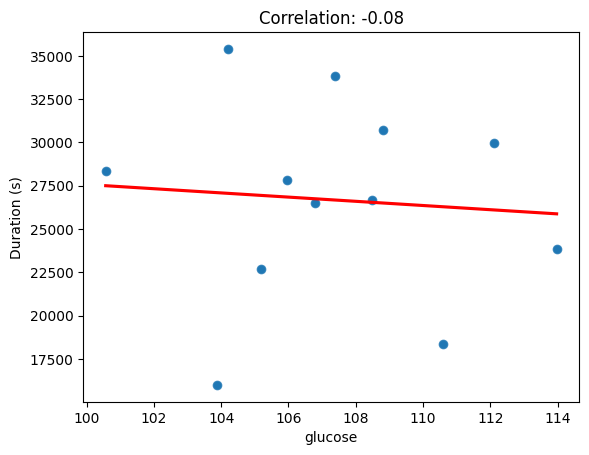

In [81]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

As the correlation coefficient is close to zero, it indicates that there is almost no linear relationship between the two columns. 

Correlation Coefficient: -0.4277888111830138


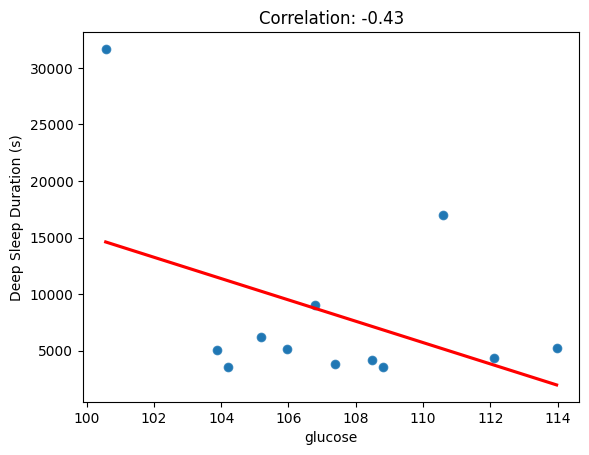

In [80]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

A correlation coefficient of approximately -0.43 indicates a moderate negative correlation between the two variables. The negative sign suggests that as one variable increases, the other tends to decrease, and vice versa. The magnitude of -0.43 suggests that the relationship is stronger than a weak correlation but not extremely strong.

Correlation Coefficient: -0.5594624692168104


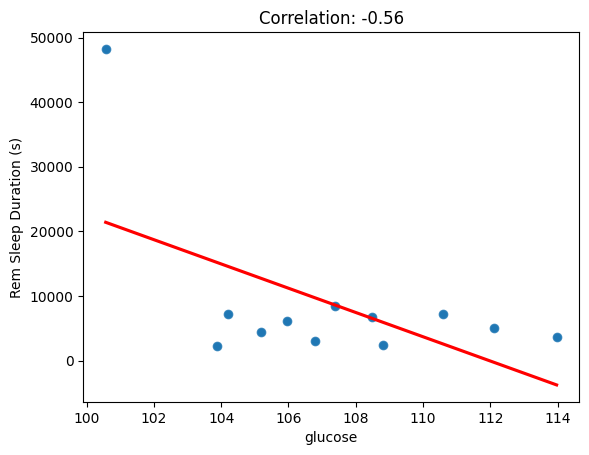

In [79]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Rem Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: -0.5404692688567403


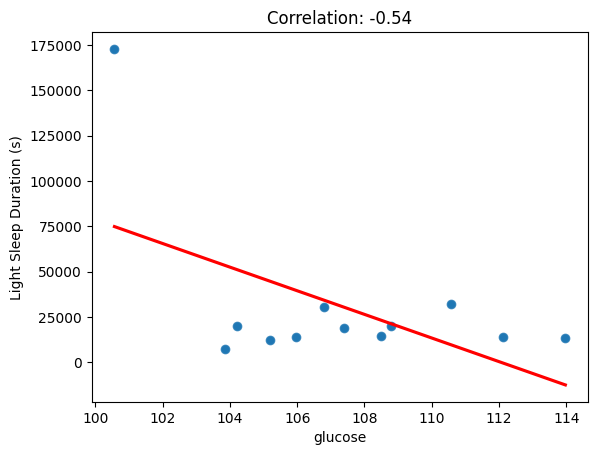

In [78]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Light Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()